> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb_movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.It acomblished from 21 columns each column tell us a thing the popularity ,budget , revenue , the title , cast ,homepage , director , tagline ,overview ,runtime, genres ,release_date,release_year and more we will use this information to answer some questions about this data.
 
### Question(s) for Analysis
1-Which genres are most popular from year to year?<br>
2-What kinds of properties are associated with movies that have high revenues?<br>
3-do movies have high vote_avarge have high popularity?<br>
4-are movies with long titles more populer?<br>
5-who is the director with most populer movies?<br>



In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [4]:
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

In [5]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='wrangling'></a>
## Data Wrangling


In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head(5)
df.duplicated()


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning


I will drop some columns that not effect my analysis

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(["budget_adj","revenue_adj","imdb_id","id","homepage","tagline","production_companies","overview","keywords"],axis=1,inplace=True)
df.head(5)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


see data info to make decision about missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


cast ,director ,genres all thoes are important to my questiones so i will drop the whole missing row

In [12]:
df.dropna(axis=0,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


sort the genres to make it more rebetable

In [13]:
df["genres"] = df["genres"].apply(lambda x:sorted(x.split("|")))
df["genres"] =df["genres"].apply(lambda x:" ".join(x))

In [14]:
df[df["revenue"]==0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Crime Drama Thriller,1/14/15,481,5.3,2015
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Action Crime Thriller,5/21/15,280,5.4,2015
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action Adventure Fantasy,6/24/15,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy Drama,6/12/15,569,7.7,2015
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Action Adventure Fantasy,12/19/15,11,5.4,2015
93,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Action Adventure Science Fiction Thriller,1/16/15,181,4.1,2015
100,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure Animation Family,3/9/15,475,7.0,2015
101,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action Drama Science Fiction,9/26/15,161,5.4,2015
103,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,104,Action Thriller,4/11/15,114,5.6,2015
116,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action Adventure Fantasy,1/9/15,22,4.5,2015


there is multiple revenue  value =0 more than 5000row

i will complete tham becasue i need this column to answer questions but how?

 i have complited replacing missing value in budget and revenue with the mean

In [15]:
condition = (df["revenue"] == 0)
df.loc[condition,"revenue"] = df["revenue"].mean()

In [16]:
df["budget"] =df["budget"].replace(0,df["budget"].mean())

<a id='eda'></a>
## Exploratory Data Analysis


## Which genres are most popular from year to year? 

i first get the unique years i have and than i made a mask to get the maximum popularity in each year from that i can 
detect the genres with highest popularity in that year .

in other way the movie with high popularity is the movie we need it genres and so it is the most popular genres in that year

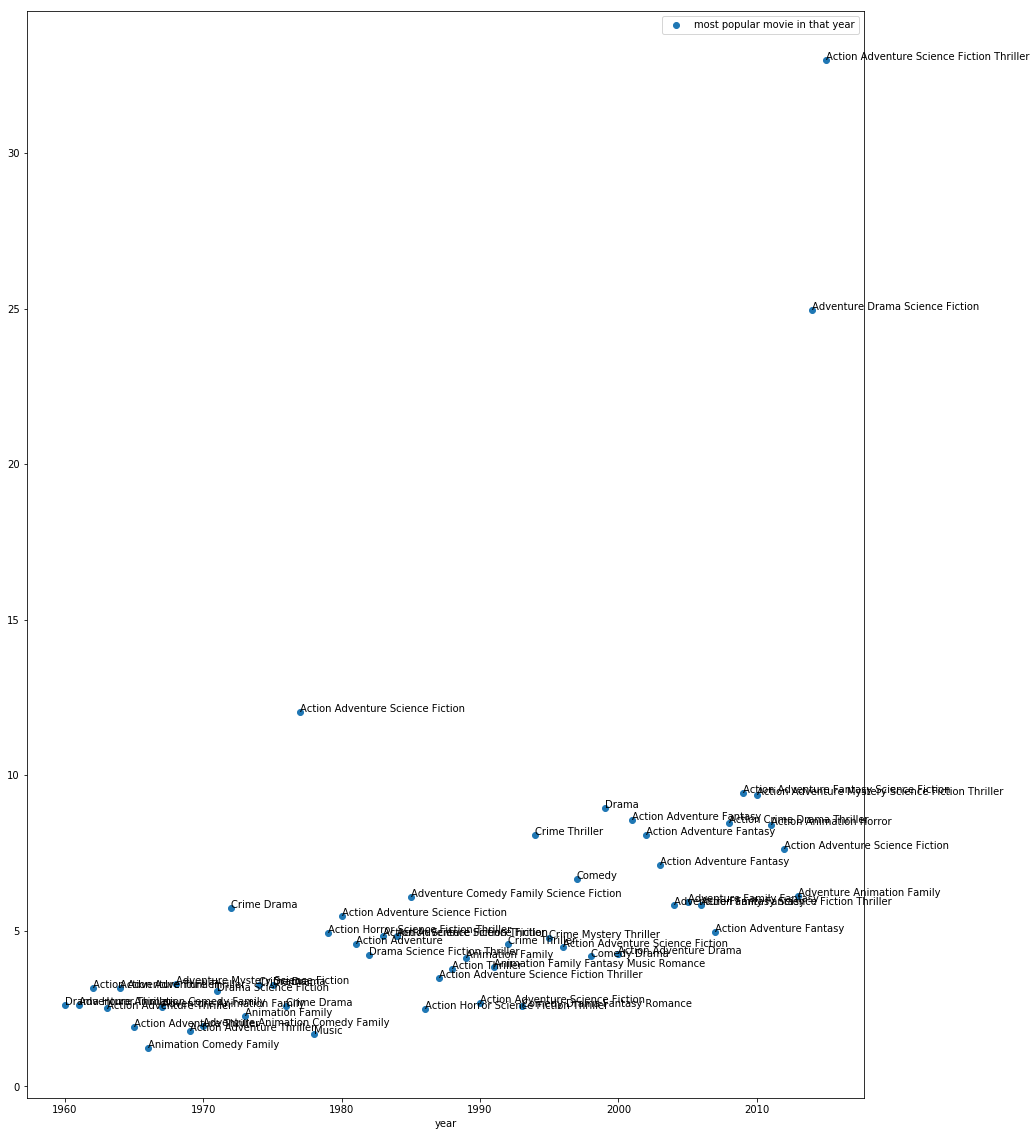

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df2 =pd.DataFrame()
year_pop =[]
genres=[]
for index ,year in enumerate(df["release_year"].unique()):
    year_mask = df.release_year == year
    df.popularity[year_mask].max()
    year_pop.append((year,df.popularity[year_mask].max()))
    genres.append(df.loc[df['popularity'] == df.popularity[year_mask].max(),'genres'].to_string(index=False))
x ,y =zip(*year_pop)
fig,ax =plt.subplots(figsize=(15,20))
ax.scatter(x,y);
ax.set_ylabel =("popularity")
ax.set_xlabel("year")
ax.legend(['most popular movie in that year'])

for i ,ind in enumerate(genres):
    ax.annotate(ind,(x[i],y[i]))


In [35]:
import random

In [61]:
def draw(x1,y2,title,legend):
    plt.xlabel(x1)
    plt.ylabel(y2)
    plt.title(title)
    plt.legend([legend]);


### What kinds of properties are associated with movies that have high revenues?


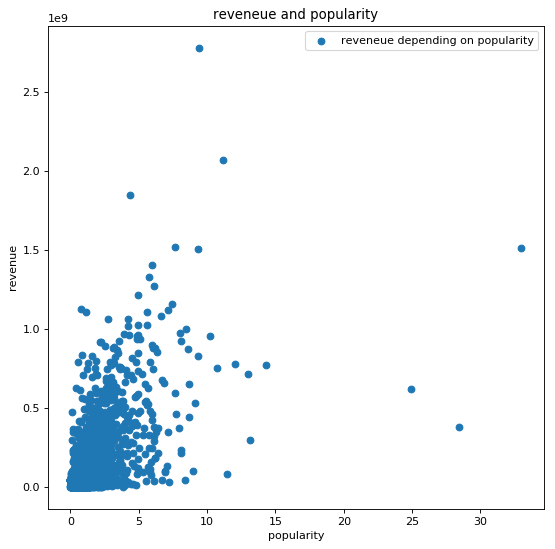

In [65]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#plt.figure(figsize=(8, 8), dpi=80)
#plt.scatter(x=df["popularity"],y=df["revenue"]);
#plt.xlabel("popularity")
#plt.ylabel("revneue")
#plt.title("reveneue and popularity")
#plt.legend(["reveneue depending on popularity"]);
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=df["popularity"],y=df["revenue"])
draw("popularity","revenue","reveneue and popularity","reveneue depending on popularity")


looks that is no relationship between popularity and revenue
as we see the traffic in the start beacuse of our fixing to the data with mean

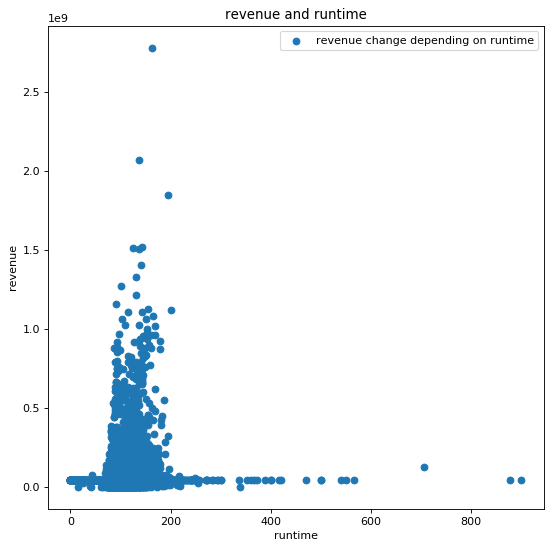

In [66]:
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(x=df["runtime"],y=df["revenue"]);
draw("runtime","revenue","revenue and runtime","revenue change depending on runtime")

we can say from this plot that maybe smaller filme run_time associted with high revenue

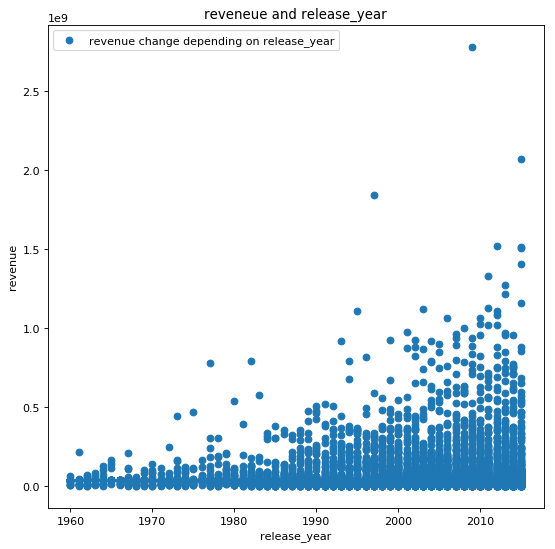

In [31]:
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(x=df["release_year"],y=df["revenue"]);
draw("release_year","revenue","reveneue and release_year","revenue change depending on release_year")

we can say from this plot that maybe the newer the movie the more revenue it gain 
we should take care from the change in money value from year to year
maybe 100 dollers have the same value of 1$ in that year

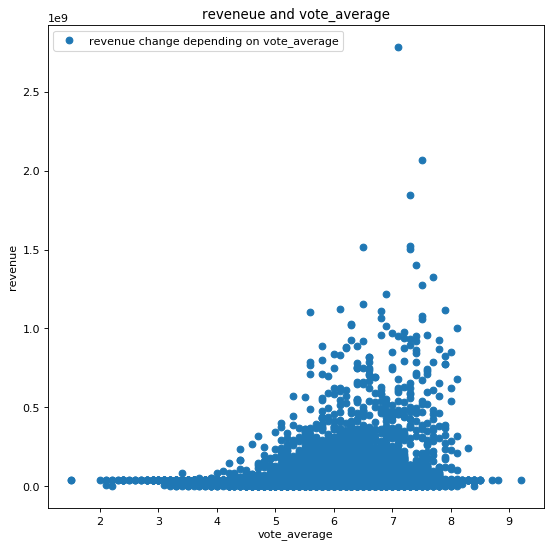

In [67]:
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(x=df["vote_average"],y=df["revenue"])
draw("vote_average","revenue","reveneue and vote_average","revenue change depending on vote_average")

we can say from this plot that the higher the vote the more revenue and that is not always as we can see we will answer this 
question deepply in the up coming cells

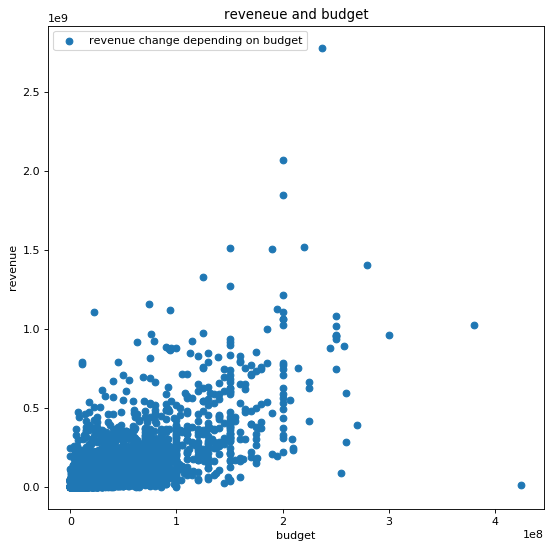

In [69]:
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(x=df["budget"],y=df["revenue"])
draw("budget","revenue","reveneue and budget","revenue change depending on budget")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
budget            10732 non-null float64
revenue           10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


### do movies have high vote_average have high popularity?

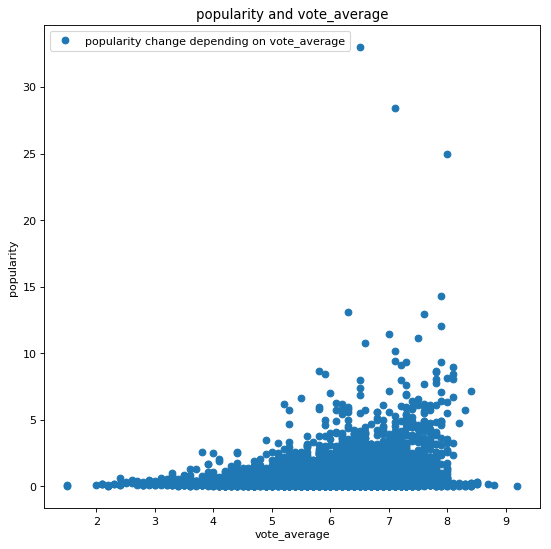

In [70]:
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(x=df["vote_average"],y=df["popularity"])
draw("vote_average","popularity","popularity and vote_average","popularity change depending on vote_average")

as the vote_Average increase the populraity increases but that not happen always we could see  very high vote value 
with very low popularity so popularity and vote_average are not related to each other 

### are movies with long titles more populer?

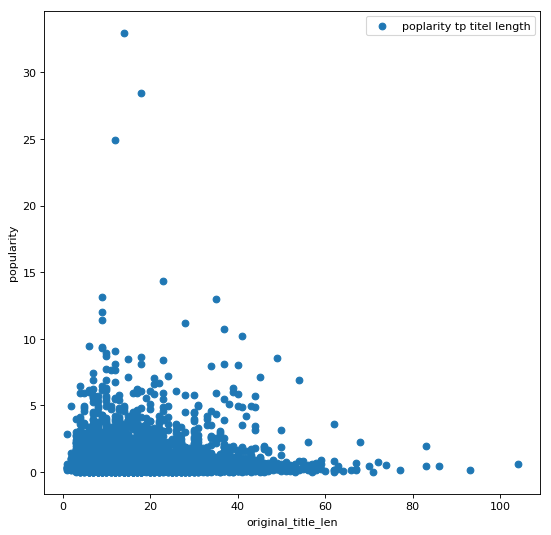

In [39]:
import copy
df2 =copy.deepcopy(df)
df["original_title"].apply(lambda x:len(x))
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(x=df["original_title"].apply(lambda x:len(x)),y=df["popularity"])
draw("original_title","popularity","popularity to title","popularity and vote_average","poplarity tp titel length")

it seems like movies with short name are more popualr than movies with long name

In [30]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action Adventure Science Fiction Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action Adventure Science Fiction Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure Science Fiction Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action Adventure Fantasy Science Fiction,12/15/15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action Crime Thriller,4/1/15,2947,7.3,2015


### who is the director of most populer movies?

In [37]:
df[df["popularity"]==df.popularity.max()]["director"]
df.groupby("director")["popularity"].mean()[df[df["popularity"]==df.popularity.max()]["director"]]

director
Colin Trevorrow    16.696886
Name: popularity, dtype: float64

i got the max popularity as mask, grouped the movies by director to get the mean for each director 

<a id='conclusions'></a>
## Conclusions
so lets recabe or questiones :

1-Which genres are most popular from year to year?<br>
2-What kinds of properties are associated with movies that have high revenues?<br>
3-do movies have high vote_avarge have high popularity?<br>
4-are movies with long titles more populer?<br>
5-who is the director with most populer movies?<br>

First we would like to dicover which genre is the most populr from year to year, so depending on movie popularity we took it as a metric to measure genre popularity, and we got the result in the plot above with the most populr movie genre in certain year for each year in the dataset.I would like to say here that if genres was more overlapping the reslutes code be better
for examble you have movie genre that is action and coamdy and other is action if they both could have the same label under action genre that will make the analysis easier.
<br>
<br>
Seconed we was asking about the properties that are associated with movies that have high revenue, we used ploting to discover the answer from that plots it give us some intuition about which property some how related to high revenue like **runtime**,**release_year**,**budget**
<br><br>
Third we were asking that if movie have high vote_average necessarily have high popularity or not and also the answer came from the plot which it is not alwayes true some times movies have very high vote but very low popularity
<br><br>
Forth are movies with long titles more populer? there is a relation between movie length and popularity and it is negative reltion long movie names are related to low populrity and maybe the release year play a vital roal here but that need more research to discover if it have effect also.
<br><br>
fifth we was searching for the director with most populr movies Colin Trevorrow was him we discovered that by getting the mean of every director movies popularity and it was straight forward that he is the winner

one of my limitations working with these data set is the keyword column which can give us very benfit information about the movie and its popularity and the cast genres but it needs sentiment analysis techniques to deal with it  

seconed i can't represent complex relation like this involve popularity,vote_average and release_year in one shot  



In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0